# Unit 5 - Financial Planning

In [23]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from MCForecastTools import MCSimulation

%matplotlib inline

In [24]:
# Load .env enviroment variables
load_dotenv()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the stock tickers
tickers = ["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"]

# Get 1 year's worth of historical data for all stocks
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

# Display sample data
df_ticker.head()



AAPL                                       \
                             open      high      low   close    volume   
time                                                                     
2019-05-01 00:00:00-04:00  209.88  215.3100  209.230  210.52  57751414   
2019-05-02 00:00:00-04:00  209.84  212.6500  208.130  209.17  29014844   
2019-05-03 00:00:00-04:00  210.74  211.8400  210.230  211.78  17987793   
2019-05-06 00:00:00-04:00  204.29  208.8400  203.500  208.60  28949691   
2019-05-07 00:00:00-04:00  205.88  207.4175  200.825  202.86  34328425   

                              DIS                                     ...  \
                             open    high      low   close    volume  ...   
time                                                                  ...   
2019-05-01 00:00:00-04:00  137.49  138.17  136.235  136.32   7588692  ...   
2019-05-02 00:00:00-04:00  135.38  135.69  132.380  134.19  14963432  ...   
2019-05-03 00:00:00-04:00  135.22  135.31  133.780  134.28   8073628  ...   
2019-05-06 00:00:00-04:00  132.54  135.33  132.300  135.05   8946397  ...   
2019-05-07 00:00:00-04:00  135.35  135.97  132.760  133.47   9737952  ...   

                              SPY                                    WORK  \
                             open    high     low   close     volume open   
time                                                                        
2019-05-01 00:00:00-04:00  294.72  294.95  291.80  291.84   59432706  NaN   
2019-05-02 00:00:00-04:00  291.68  292.70  289.52  291.27   59209780  NaN   
2019-05-03 00:00:00-04:00  292.82  294.34  292.56  294.02   45416907  NaN   
2019-05-06 00:00:00-04:00  289.25  293.31  288.90  292.87   75426654  NaN   
2019-05-07 00:00:00-04:00  290.15  290.81  285.81  288.04  118960368  NaN   

                                                 
                          high low close volume  
time                                             
2019-05-01 00:00:00-04:00  NaN NaN   NaN    NaN  
2019-05-02 00:00:00-04:00  NaN NaN   NaN    NaN  
2019-05-03 00:00:00-04:00  NaN NaN   NaN    NaN  
2019-05-06 00:00:00-04:00  NaN NaN   NaN    NaN  
2019-05-07 00:00:00-04:00  NaN NaN   NaN    NaN  

[5 rows x 30 columns]

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [25]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [26]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [27]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)
response_content_btc = response_data_btc.content
data_btc = response_data_btc.json()
print(json.dumps(data_btc, indent=4))

# Fetch current ETH price
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
print(json.dumps(data_eth, indent=4))

# Compute current value of my crpto
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18939506,
            "total_supply": 18939506,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 36467.0,
                    "volume_24h": 37943814011,
                    "market_cap": 692015267352,
                    "percentage_change_1h": -0.189875164914872,
                    "percentage_change_24h": 8.90262337044184,
                    "percentage_change_7d": -13.7854838778465,
                    "percent_change_1h": -0.189875164914872,
                    "percent_change_24h": 8.90262337044184,
                    "percent_change_7d": -13.7854838778465
                },
                "CAD": {
                    "price": 46076.0545,
                    "volume_24h": 47942009002.8985,
                   

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [28]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [29]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [30]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = api.get_barset( tickers, timeframe, start=today, end=today,).df
df_portfolio.index = df_portfolio.index.date

# Preview DataFrame
df_portfolio.head()

AGG                                        SPY                 \
              open      high     low   close   volume    open    high    low   
2020-10-16  117.99  118.0778  117.88  117.88  3591541  348.96  350.75  347.1   

                              
             close    volume  
2020-10-16  347.25  62796942

In [31]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [32]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [33]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value

# Consolidate financial assets data
data = {'amount':[total_crypto, total_shares_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,56644.117
shares,40938.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

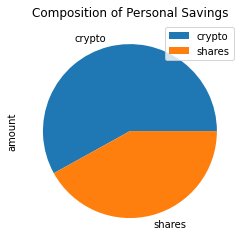

In [34]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [35]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal.")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal.")

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [36]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [37]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                            SPY          \
              open     high       low    close     volume    open    high   
2017-05-10  108.60  108.660  108.4400  108.520  1427511.0     NaN     NaN   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0  239.35  239.57   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0  239.09  239.21   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0  239.47  240.44   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0  240.62  240.67   

                                         
               low    close      volume  
2017-05-10     NaN      NaN         NaN  
2017-05-11  238.13  239.410  45435690.0  
2017-05-12  238.67  239.030  35283567.0  
2017-05-15  239.45  240.245  42230620.0  
2017-05-16  239.63  240.100  37206183.0

In [38]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [39]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                      \
              open     high       low    close     volume daily_return   
2017-05-10  108.60  108.660  108.4400  108.520  1427511.0          NaN   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0    -0.000046   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0     0.001010   

               SPY                                                    
              open    high     low    close      volume daily_return  
2017-05-10     NaN     NaN     NaN      NaN         NaN          NaN  
2017-05-11  239.35  239.57  238.13  239.410  45435690.0          NaN  
2017-05-12  239.09  239.21  238.67  239.030  35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.45  240.245  42230620.0     0.005083  
2017-05-16  240.62  240.67  239.63  240.100  37206183.0    -0.000604

In [40]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Ramin\Desktop\Personal-Finance-Planner\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.021931,1.007209,1.009477,0.988402,1.005109,1.002139,1.002548,0.983483,0.999654,1.009680,...,0.998983,1.018574,1.004710,1.004534,0.992883,0.995991,1.013054,1.002575,1.003580,1.009466
2,1.023782,1.008787,1.016188,0.994055,1.013141,0.994287,1.000353,0.998563,0.996425,1.005715,...,1.007926,1.010610,1.007211,1.001323,0.986392,0.985933,1.008036,1.018507,1.002503,1.008225
3,1.036474,0.995438,1.020219,0.981089,1.013436,0.992884,1.012980,0.987244,0.987109,1.018508,...,1.011447,1.015725,1.019448,0.996240,0.983649,0.994799,0.999031,1.026991,1.010786,1.009277
4,1.026226,1.001300,1.008068,0.970288,1.010046,0.983923,1.000726,0.987750,0.999912,1.022599,...,1.002654,1.020335,1.023553,0.998973,0.997892,0.999367,1.011773,1.033450,1.007036,1.012389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,60.134648,2.494288,29.731140,9.495542,16.504055,16.183966,3.593914,25.179366,9.958727,20.063872,...,28.749721,13.880560,10.023553,20.975078,45.630868,36.864143,19.298232,25.239808,10.980782,20.555116
7557,60.127468,2.457369,29.708715,9.473358,16.524113,16.232433,3.641524,25.353935,10.034141,19.964226,...,28.559238,13.793886,10.058545,21.151001,45.746343,36.381501,18.920411,25.194802,10.898986,20.437797
7558,60.556014,2.467747,29.716488,9.419042,16.489409,16.350842,3.623171,25.211483,10.033982,19.899628,...,28.952893,13.782483,9.948368,21.059846,45.915276,36.449261,18.825422,25.198092,10.826144,20.474103
7559,59.730647,2.443903,29.949384,9.633228,16.519310,16.242071,3.633875,25.694007,9.968229,19.674903,...,28.832656,13.918886,9.974748,20.984506,45.694578,36.498669,18.937798,25.207469,10.740024,20.457707


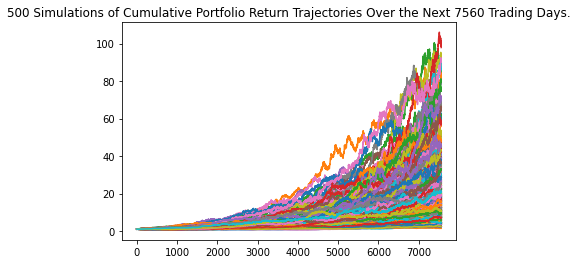

In [41]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

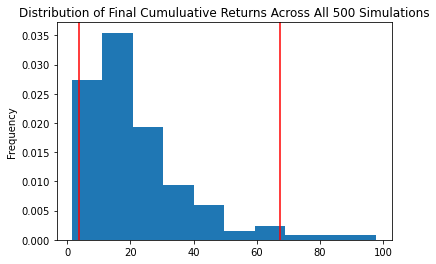

In [42]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             21.978609
std              16.297814
min               1.437342
25%              10.915371
50%              17.101715
75%              27.289590
max              97.919119
95% CI Lower      3.714768
95% CI Upper     67.543017
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [44]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $74295.36 and $1350860.33


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [45]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $111443.04 and $2026290.5


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [46]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                      \
              open     high       low    close     volume daily_return   
2017-05-10  108.60  108.660  108.4400  108.520  1427511.0          NaN   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0    -0.000046   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0     0.001010   

               SPY                                                    
              open    high     low    close      volume daily_return  
2017-05-10     NaN     NaN     NaN      NaN         NaN          NaN  
2017-05-11  239.35  239.57  238.13  239.410  45435690.0          NaN  
2017-05-12  239.09  239.21  238.67  239.030  35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.45  240.245  42230620.0     0.005083  
2017-05-16  240.62  240.67  239.63  240.100  37206183.0    -0.000604

In [47]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Ramin\Desktop\Personal-Finance-Planner\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007743,1.005869,1.004850,0.997636,1.006320,1.013558,0.997683,1.001356,0.999433,1.004040,...,1.004026,0.993065,0.989834,0.984755,1.013917,1.000170,0.998724,1.009796,1.003377,1.010803
2,1.001094,1.010888,0.998905,0.983121,1.014436,1.008746,0.997630,0.991840,1.017595,0.991148,...,1.005346,0.981934,0.995876,0.983662,0.997452,0.994515,0.994506,1.025852,1.003028,1.007764
3,1.003118,1.010301,1.014684,0.970880,1.012011,1.020706,0.990468,0.992273,1.008388,0.993312,...,0.999561,0.984983,1.006426,0.993470,0.994956,0.993043,1.009501,1.030408,1.002799,1.014195
4,0.998227,1.017290,1.007377,0.979953,1.008401,1.015723,0.994107,0.996876,1.007749,0.991943,...,0.992695,0.977316,1.011776,0.996795,1.000258,0.981385,1.021389,1.028659,1.016914,1.010397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.676304,1.591014,1.273574,2.092763,1.663601,1.521510,2.467202,1.801193,1.289434,1.747799,...,1.266582,1.494391,1.188233,2.522909,1.960713,2.270960,1.504661,1.639763,1.418222,1.132102
1257,1.671832,1.606942,1.286243,2.113022,1.635072,1.520290,2.484220,1.805437,1.295225,1.749874,...,1.263182,1.513814,1.179120,2.537333,1.972265,2.284098,1.524872,1.650120,1.406833,1.132650
1258,1.668727,1.629728,1.292962,2.094055,1.631718,1.527841,2.487039,1.815478,1.295078,1.750273,...,1.277739,1.519963,1.188151,2.537270,1.993488,2.261392,1.506894,1.647127,1.386769,1.139407
1259,1.666225,1.632617,1.288115,2.126858,1.649528,1.513075,2.497455,1.821202,1.279872,1.758420,...,1.280890,1.506834,1.194377,2.538039,2.001480,2.270092,1.516375,1.631410,1.394573,1.139012


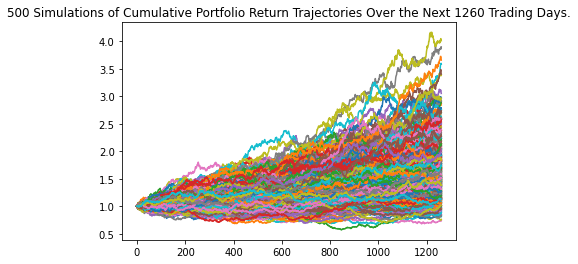

In [48]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

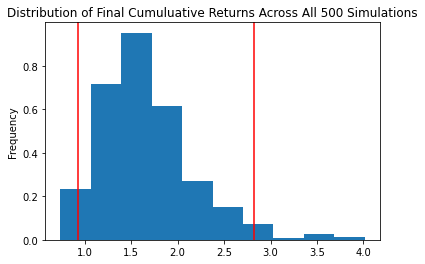

In [49]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              1.655018
std               0.499673
min               0.736731
25%               1.301820
50%               1.568141
75%               1.891802
max               4.013582
95% CI Lower      0.928657
95% CI Upper      2.816550
Name: 1260, dtype: float64


In [51]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $55719.39 and $168992.97


### Ten Years Retirement Option

In [52]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                      \
              open     high       low    close     volume daily_return   
2017-05-10  108.60  108.660  108.4400  108.520  1427511.0          NaN   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0    -0.000046   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0     0.001010   

               SPY                                                    
              open    high     low    close      volume daily_return  
2017-05-10     NaN     NaN     NaN      NaN         NaN          NaN  
2017-05-11  239.35  239.57  238.13  239.410  45435690.0          NaN  
2017-05-12  239.09  239.21  238.67  239.030  35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.45  240.245  42230620.0     0.005083  
2017-05-16  240.62  240.67  239.63  240.100  37206183.0    -0.000604

In [53]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Ramin\Desktop\Personal-Finance-Planner\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.


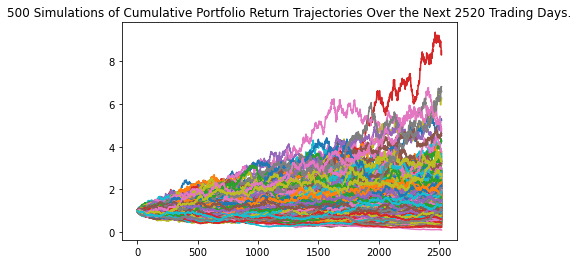

In [ ]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

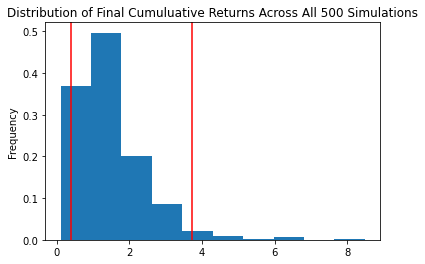

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              1.499829
std               0.974757
min               0.108797
25%               0.832050
50%               1.275683
75%               1.894593
max               8.484189
95% CI Lower      0.384560
95% CI Upper      3.728373
Name: 2520, dtype: float64


In [ ]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $23073.6 and $223702.38
